In [171]:
import numpy as np
import os
import pandas as pd
from corm import model
import seaborn as sns
import matplotlib.pyplot as plt
import corner
%matplotlib inline
from time import time

In [2]:
os.chdir('/Users/Erin/git/COX2/results')

In [3]:
mcmc_samples = pd.DataFrame(np.load('2015_02_02_COX2_all_traces.npy'), columns=['kcat_AA2', 'kcat_AA3', 'KD_AG_cat3', 'KD_AG_cat2', 'KD_AG_allo2', 'KD_AG_allo1', 'KD_AA_allo1', 'KD_AA_allo2', 'KD_AA_allo3', 'kcat_AG3', 'KD_AA_cat3', 'KD_AA_cat2'])

In [4]:
mcmc_samples

,kcat_AA2,kcat_AA3,KD_AG_cat3,KD_AG_cat2,KD_AG_allo2,KD_AG_allo1,KD_AA_allo1,KD_AA_allo2,KD_AA_allo3,kcat_AG3,KD_AA_cat3,KD_AA_cat2
0,0.858683,0.209633,-3.739227,-1.646591,0.222622,3.322358,2.992801,0.130806,-0.626225,-0.735673,-2.940959,-3.180799
1,0.858683,0.209633,-3.739227,-1.646591,0.222622,3.322358,2.992801,0.130806,-0.626225,-0.735673,-2.940959,-3.180799
2,0.858683,0.209633,-3.739227,-1.646591,0.222622,3.322358,2.992801,0.130806,-0.626225,-0.735673,-2.940959,-3.180799
3,0.858683,0.209633,-3.739227,-1.646591,0.222622,3.322358,2.992801,0.130806,-0.626225,-0.735673,-2.940959,-3.180799
4,0.858683,0.209633,-3.739227,-1.646591,0.222622,3.322358,2.992801,0.130806,-0.626225,-0.735673,-2.940959,-3.180799
5,0.858683,0.209633,-3.739227,-1.646591,0.222622,3.322358,2.992801,0.130806,-0.626225,-0.735673,-2.940959,-3.180799
6,0.858683,0.209633,-3.739227,-1.646591,0.222622,3.322358,2.992801,0.130806,-0.626225,-0.735673,-2.940959,-3.180799
7,0.858683,0.209633,-3.739227,-1.646591,0.222622,3.322358,2.992801,0.130806,-0.626225,-0.735673,-2.940959,-3.180799
8,0.858683,0.209633,-3.739227,-1.646591,0.222622,3.322358,2.992801,0.130806,-0.626225,-0.735673,-2.940959,-3.180799
9,0.858683,0.209633,-3.739227,-1.646591,0.222622,3.322358,2.992801,0.130806,-0.626225,-0.735673,-2.940959,-3.180799


In [4]:
mcmc_samples.min(axis=0)

kcat_AA2      -0.096719
kcat_AA3      -0.000296
KD_AG_cat3    -5.810060
KD_AG_cat2    -3.674716
KD_AG_allo2   -0.729875
KD_AG_allo1    0.341470
KD_AA_allo1    0.026676
KD_AA_allo2   -0.255779
KD_AA_allo3   -0.803745
kcat_AG3      -0.922461
KD_AA_cat3    -5.163200
KD_AA_cat2    -5.727884
dtype: float64

In [6]:
unique_samples = mcmc_samples.drop_duplicates()

In [7]:
unique_samples.index

Int64Index([     0,     11,     19,     24,     25,     26,     28,     30,
                31,     34,
            ...
            349818, 349834, 349840, 349845, 349899, 349900, 349907, 349922,
            349947, 349980],
           dtype='int64', length=46666)

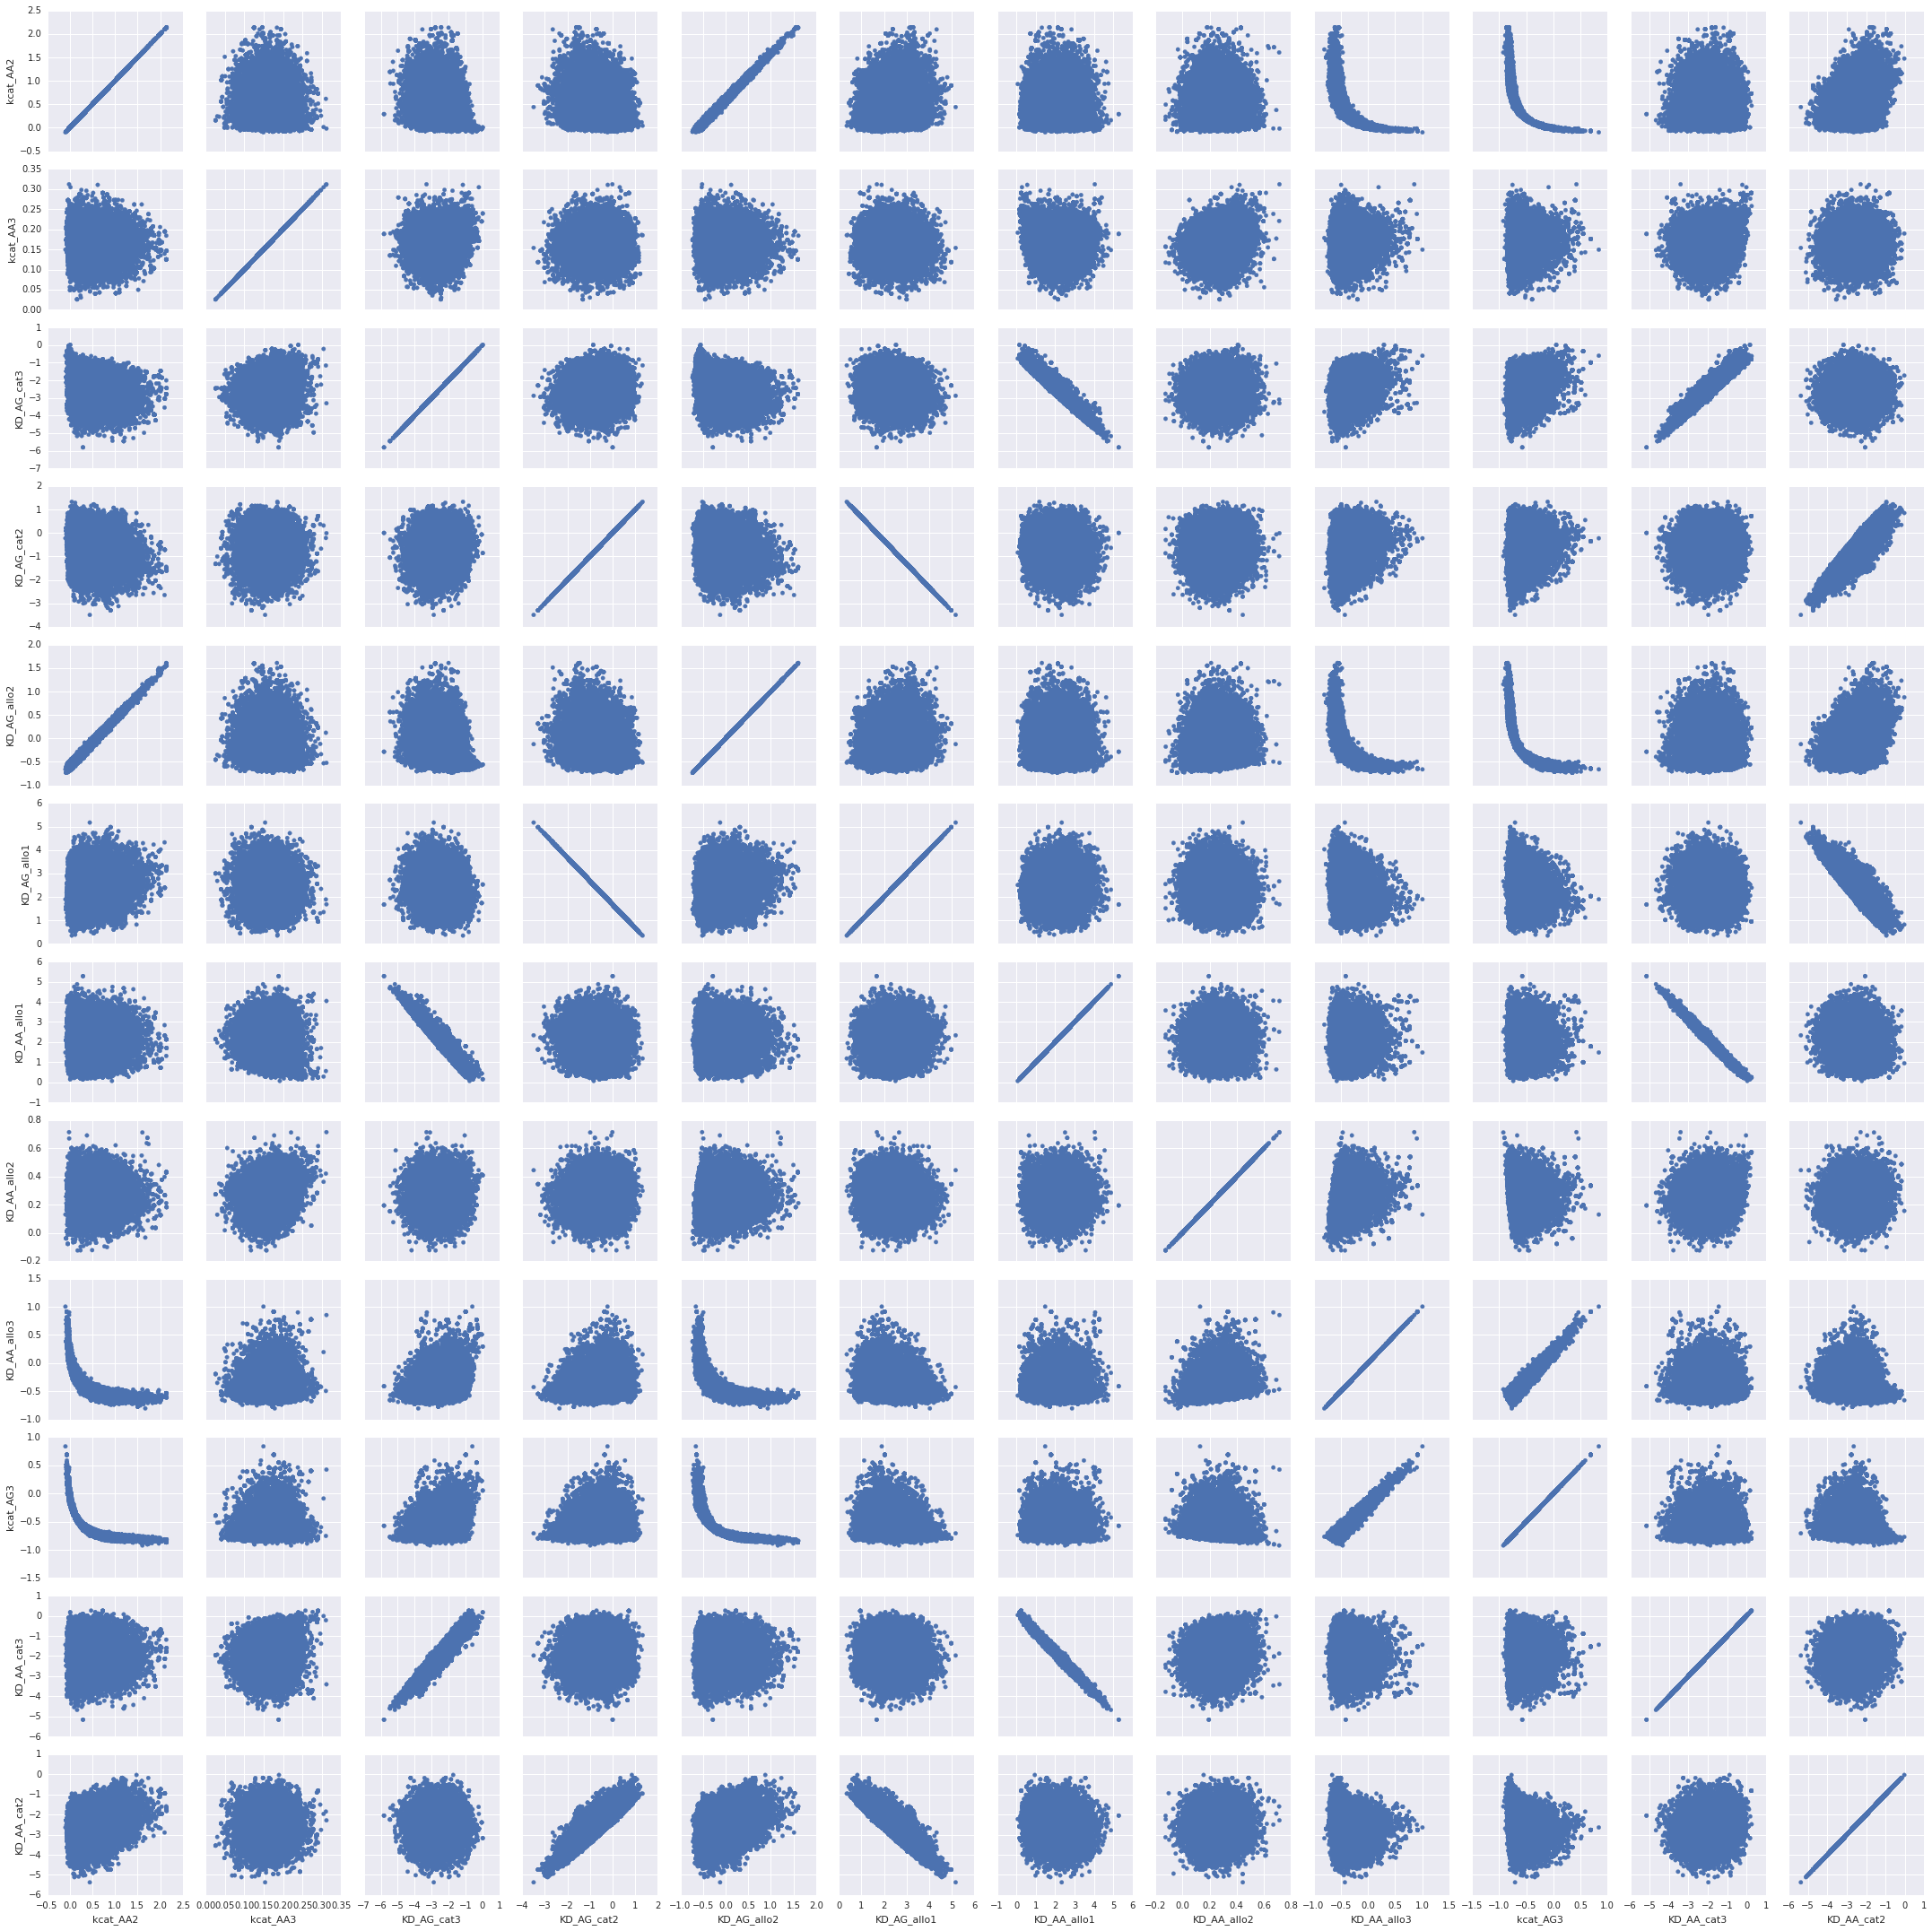

In [7]:
g = sns.PairGrid(mcmc_samples.sample(frac=.10))
g.map(plt.scatter)
#g.map_diag(plt.hist)
#g.map_offdiag(sns.kdeplot, cmap="Blues_d", shade=True)
#g.map_offdiag(plt.scatter)

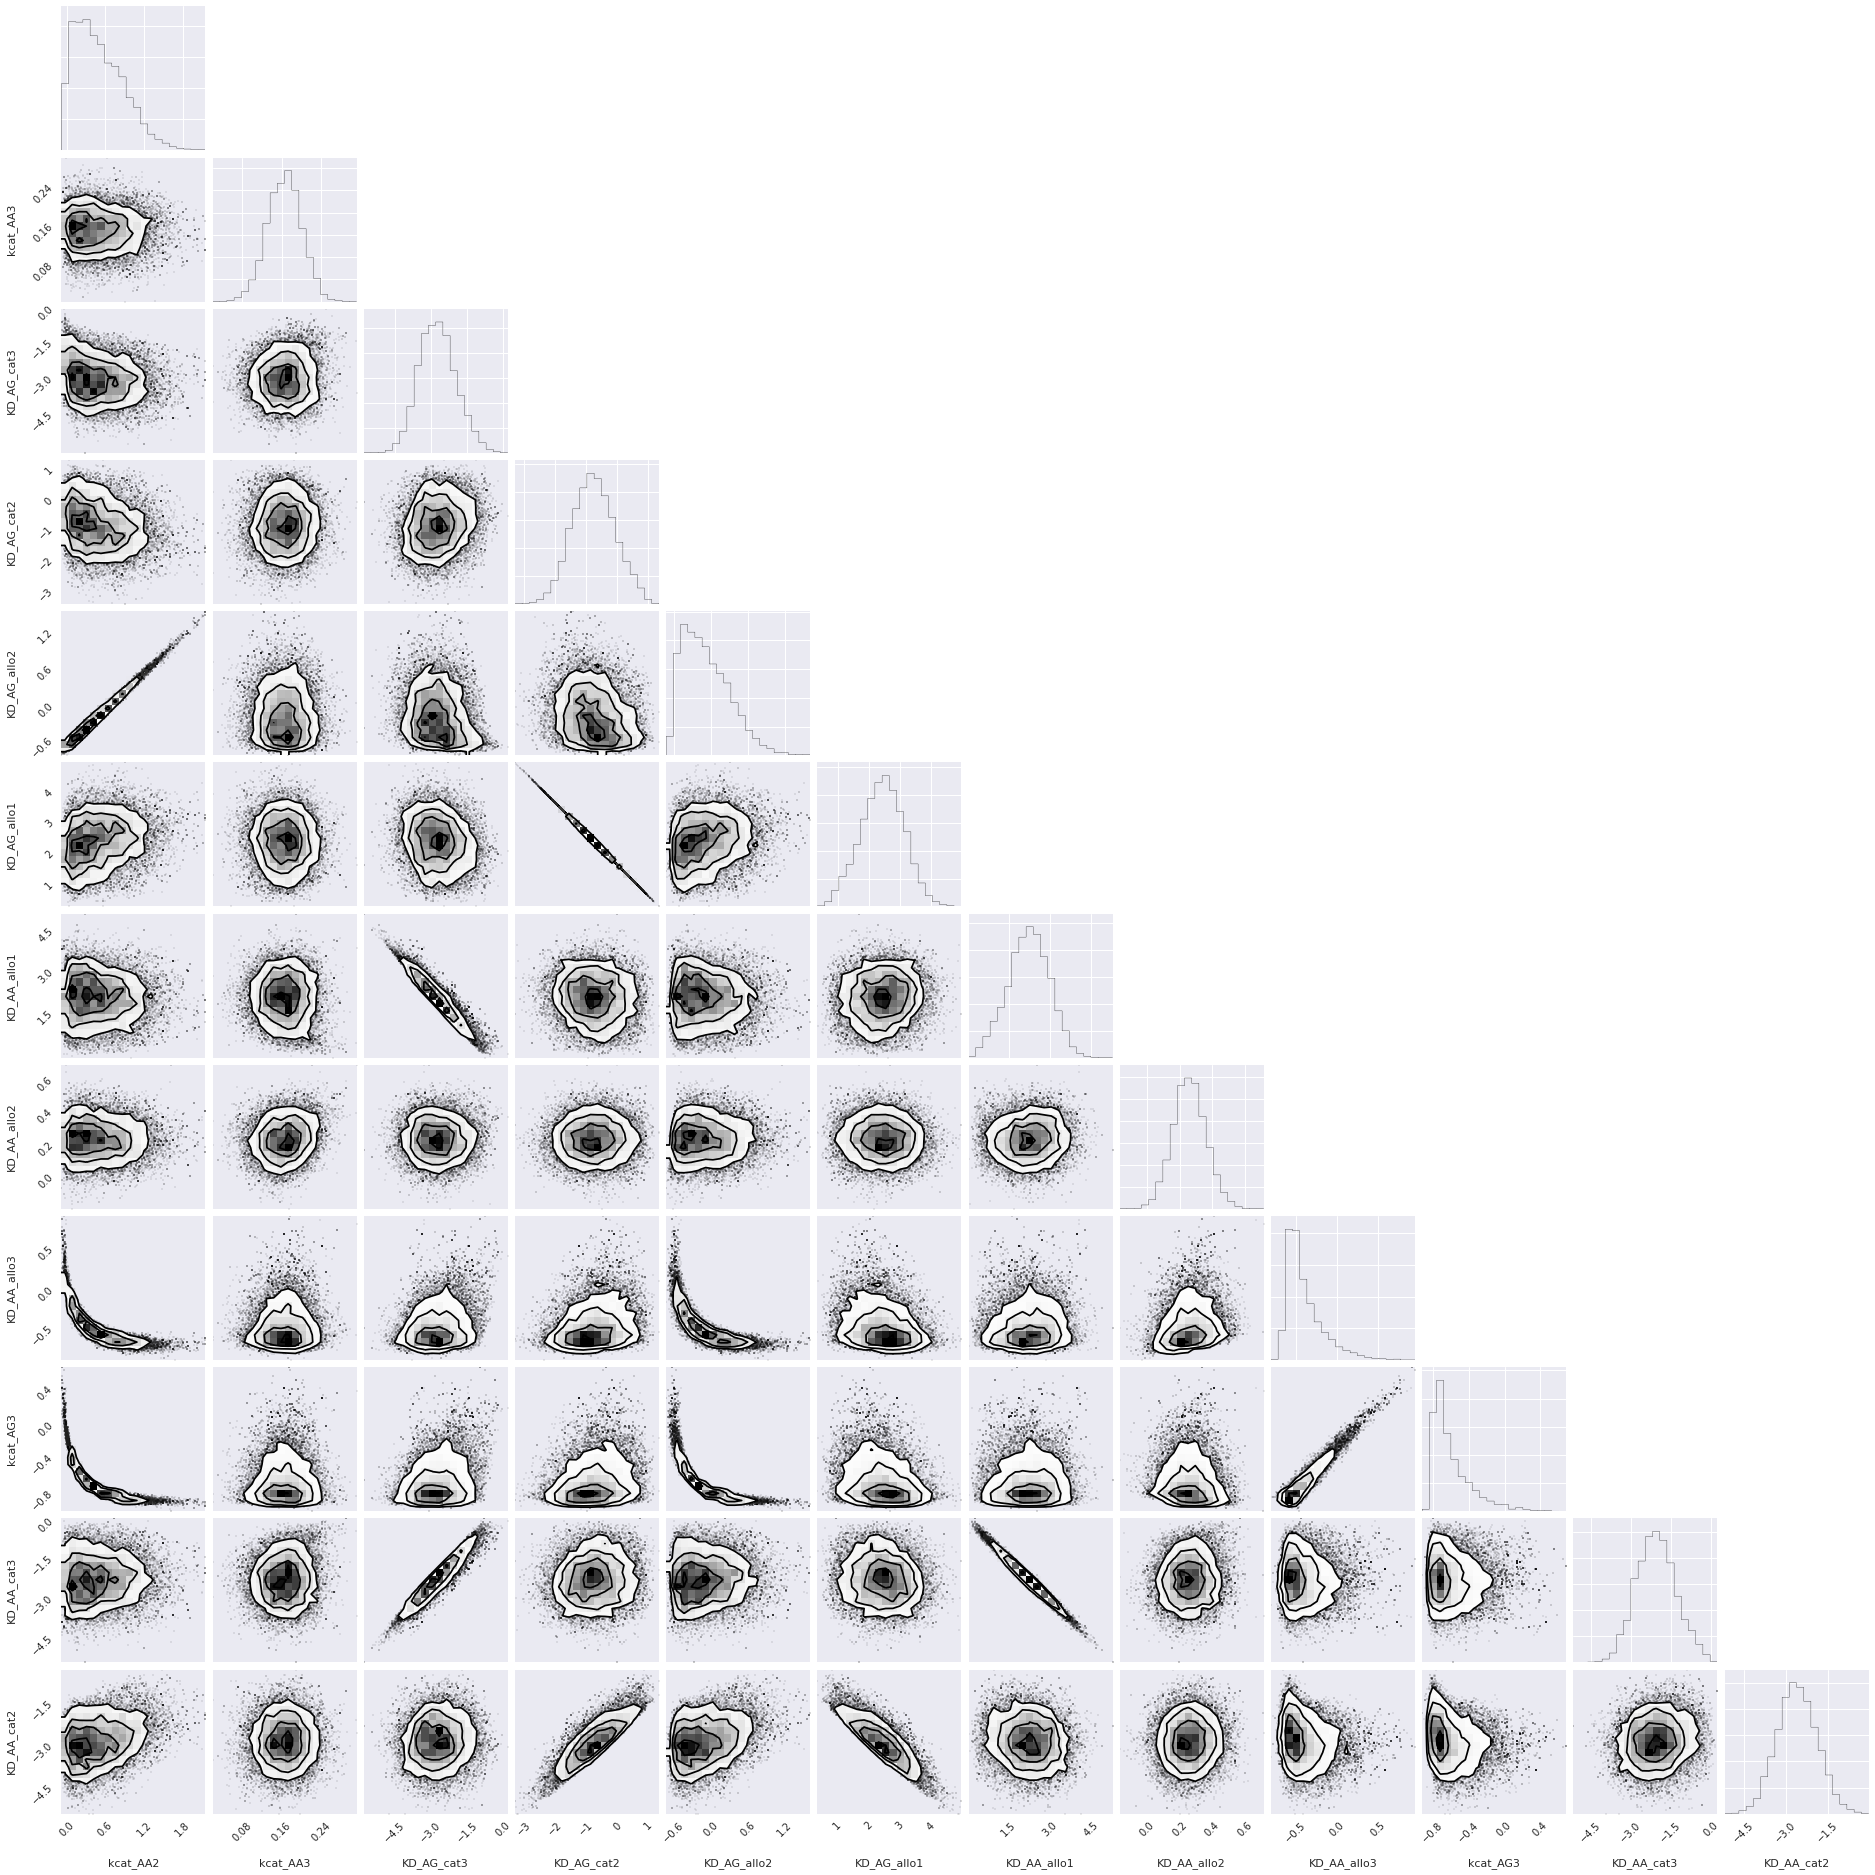

In [8]:
fig = corner.corner(mcmc_samples.sample(frac=.10).values, labels=mcmc_samples.columns)

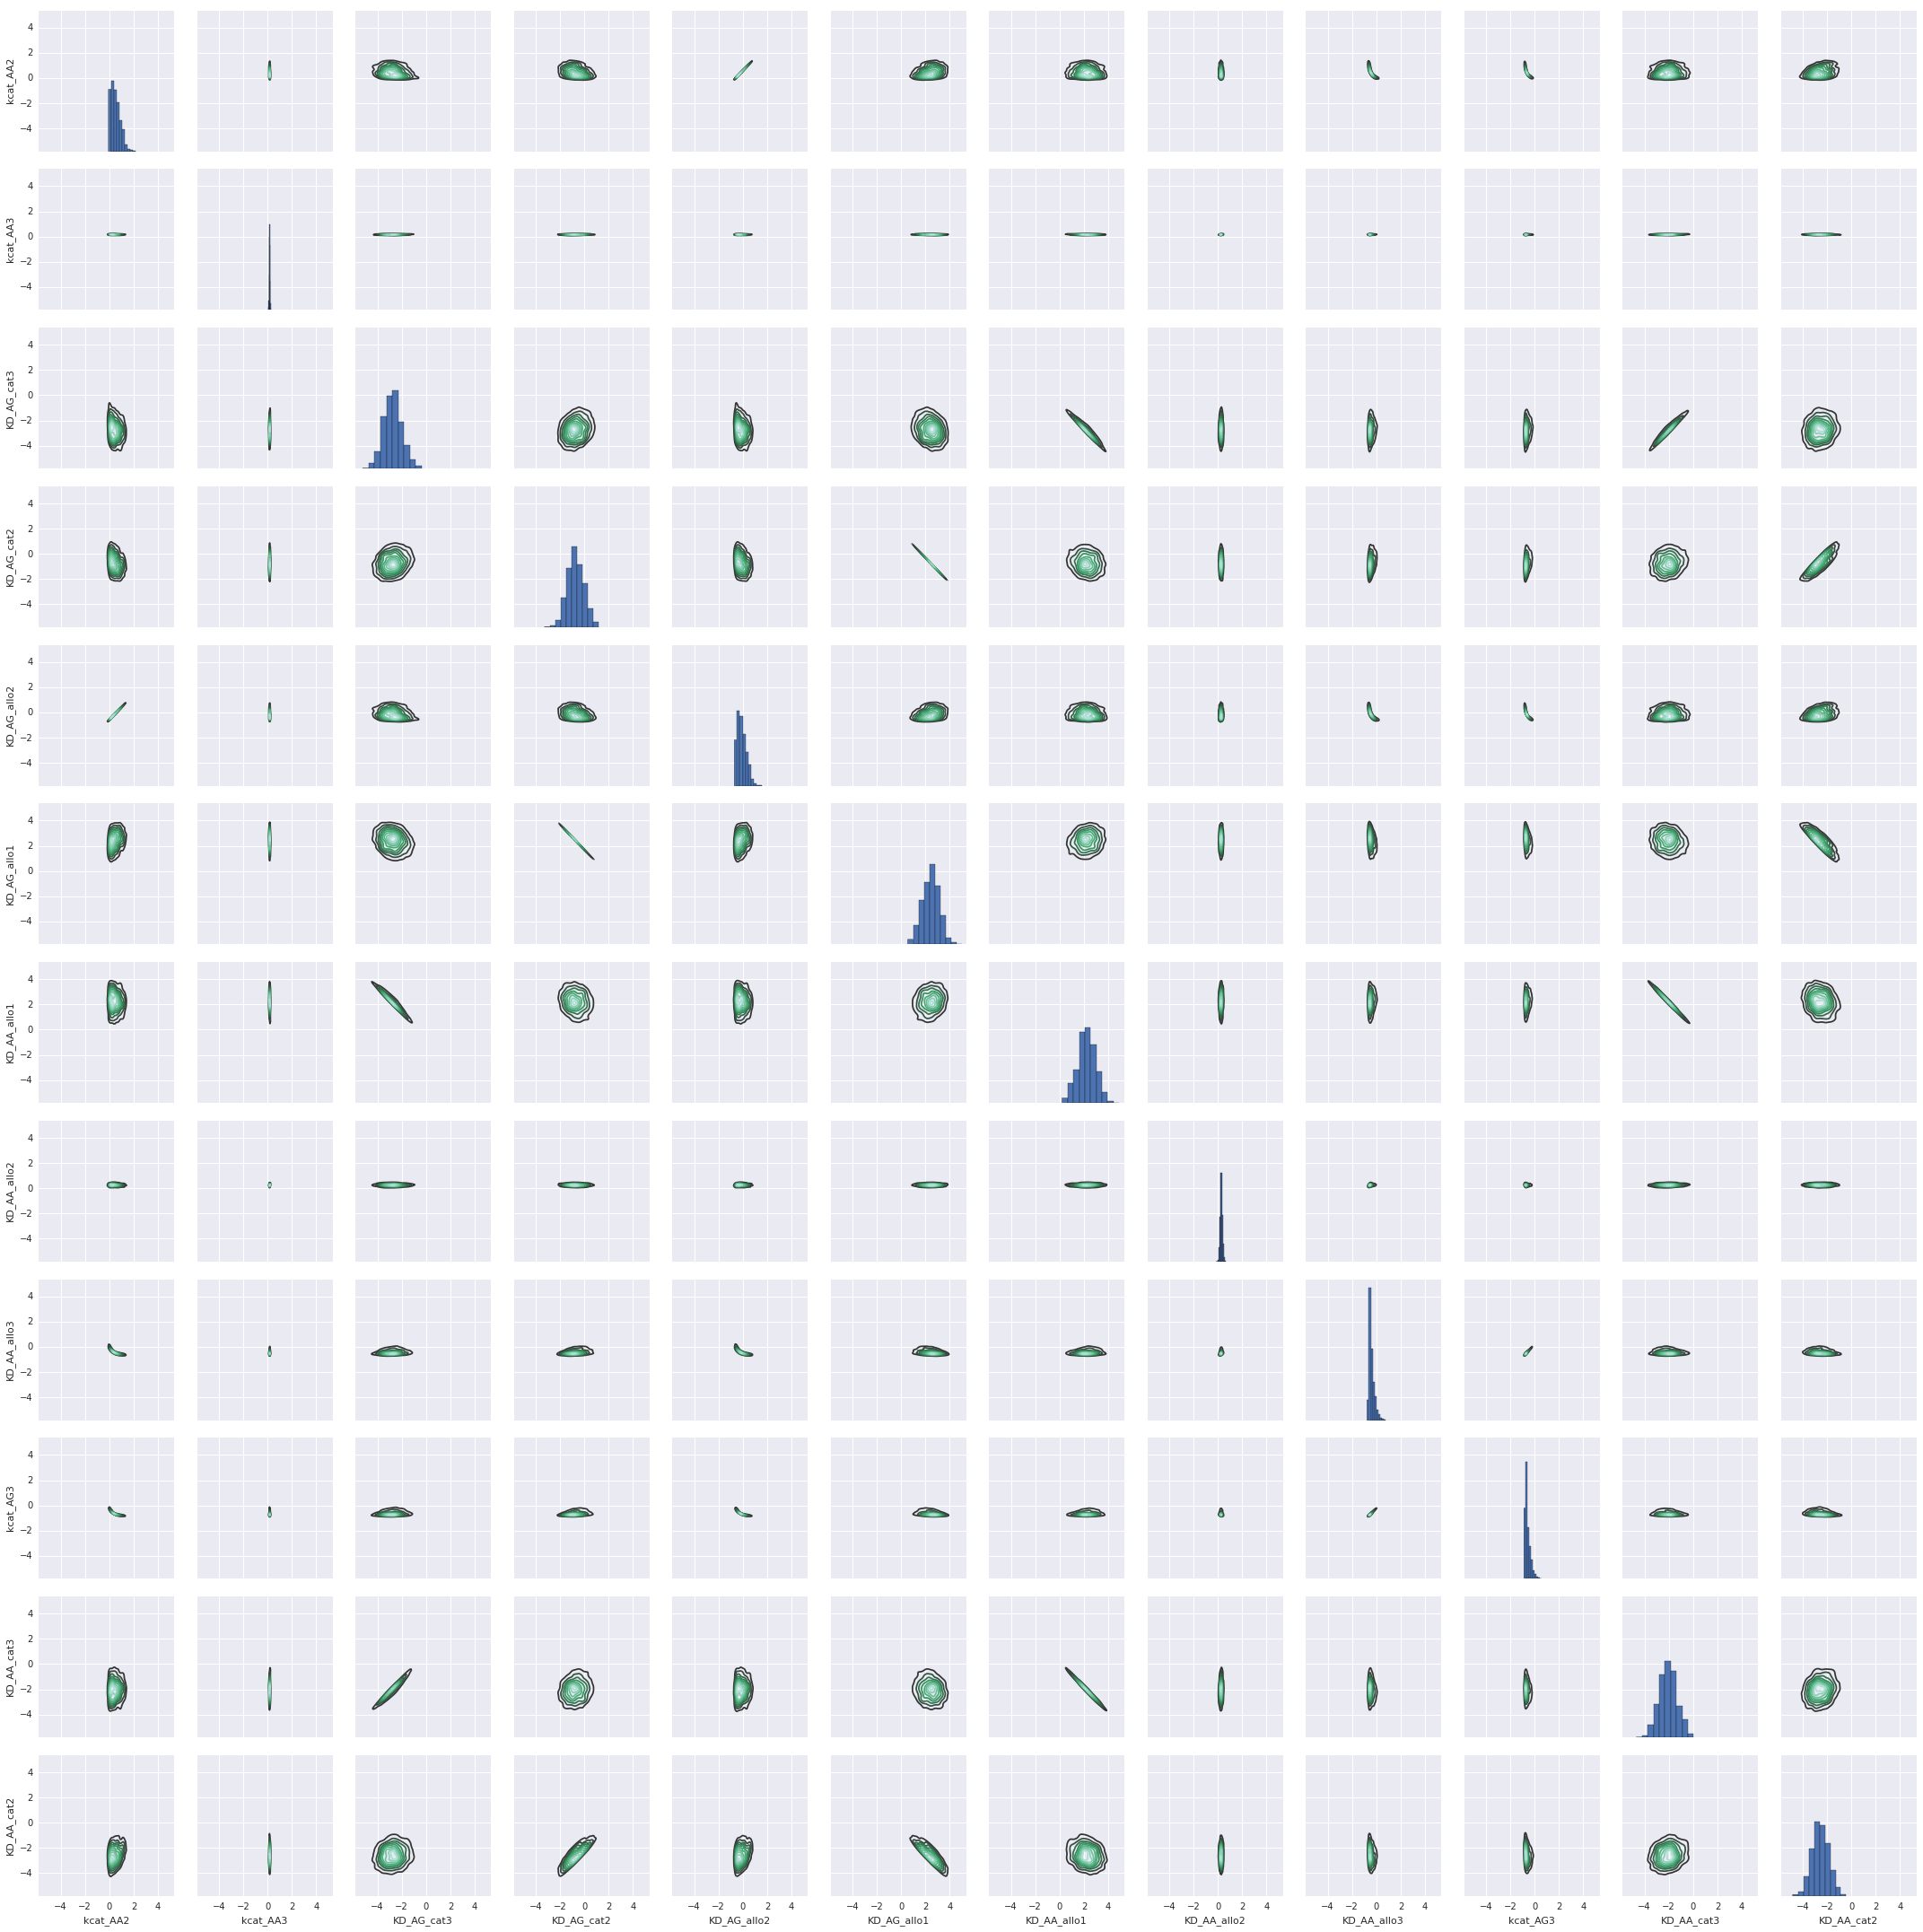

In [9]:
g = sns.PairGrid(mcmc_samples.sample(frac=.01))
g.map_diag(plt.hist)
g.map_offdiag(sns.kdeplot)
axes = g.axes
min_val = mcmc_samples.min(axis=0).min()
max_val = mcmc_samples.max(axis=0).max()
for parami in range(len(mcmc_samples.columns)):
    for paramj in range(len(mcmc_samples.columns)):
        axes[parami, paramj].set_xlim(min_val, max_val)
        axes[parami, paramj].set_ylim(min_val, max_val)

In [1]:
sampled_param_names = ['kr_AA_cat2', 'kcat_AA2', 'kr_AA_cat3', 'kcat_AA3', 'kr_AG_cat2', 'kr_AG_cat3', 'kcat_AG3', 'kr_AA_allo1', 'kr_AA_allo2', 'kr_AA_allo3', 'kr_AG_allo1', 'kr_AG_allo2']

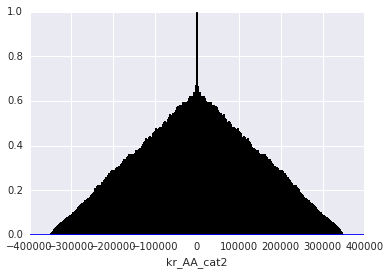

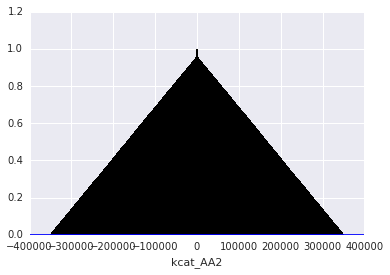

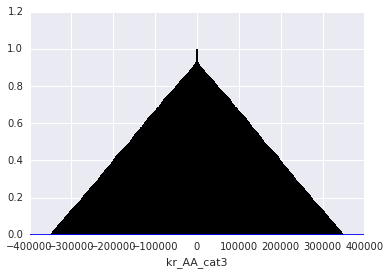

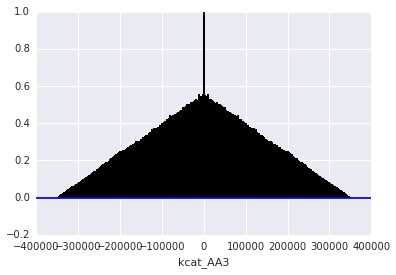

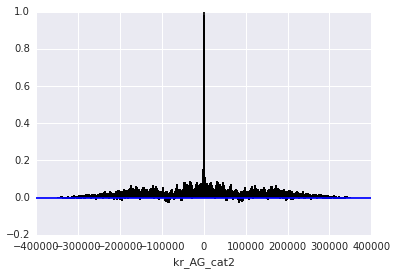

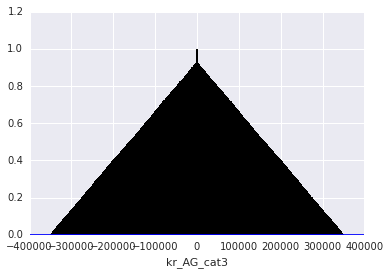

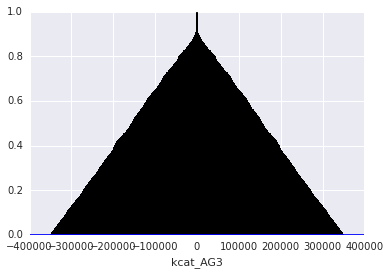

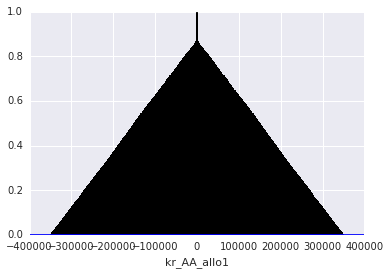

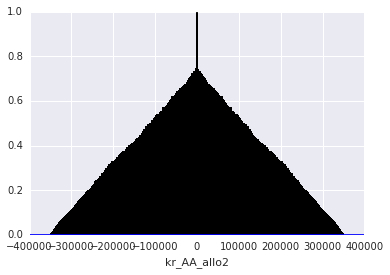

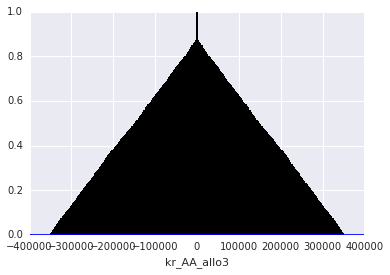

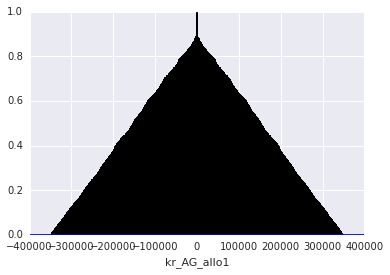

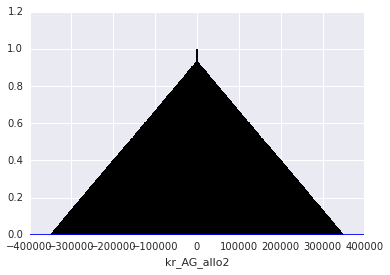

In [6]:
for dim, param_name in enumerate(sampled_param_names):
    fig = plt.figure()
    plt.acorr(mcmc_samples.values[:,dim], maxlags=None)
    plt.xlabel(str(param_name))

In [5]:
unique_samples = mcmc_samples.drop_duplicates()

In [8]:
test_unique = np.squeeze(np.dstack((unique_samples['kcat_AA2'].values, unique_samples['kcat_AG3'].values, unique_samples['KD_AA_allo1'])))

In [14]:
from scipy.spatial import ConvexHull
from mpl_toolkits.mplot3d import Axes3D

In [10]:
hull = ConvexHull(test_unique)

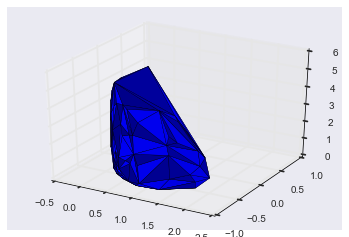

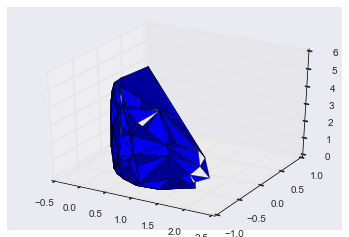

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(test_unique[:,0], test_unique[:,1], test_unique[:,2], triangles=hull.simplices)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(test_unique[:,0], test_unique[:,1], test_unique[:,2], triangles=new_simplices)

In [164]:
-

In [165]:
removed_simplices = prune_outer_points(test_unique)

Removed triangle with lengths:  1.67187098796 2.67354183689 2.91508290632
Removed triangle with lengths:  1.69228206739 1.33729004886 1.16318312454
Removed triangle with lengths:  0.482126863063 0.576140716899 1.16318312454
Removed triangle with lengths:  2.13038185888 0.607812756322 2.67354183689
Removed triangle with lengths:  1.34530426431 2.36312565527 2.1380164663
Removed triangle with lengths:  1.2524847718 0.226937072483 1.41248093503
Removed triangle with lengths:  0.379518975368 0.840399634046 1.41248093503
Removed triangle with lengths:  1.40811719847 2.65410498653 2.36312565527
Removed triangle with lengths:  1.68079681419 2.84759483868 2.91508290632
Removed triangle with lengths:  2.82374763546 2.84759483868 0.305825577741
Removed triangle with lengths:  1.55603636193 0.487080469147 2.29392930101
Removed triangle with lengths:  1.07178044923 1.86482640571 1.5928305783
Removed triangle with lengths:  0.774579184258 1.11440394651 0.41679105543
Removed triangle with lengths:  

In [87]:
tri = Delaunay(test_unique)

In [182]:
pt_idxs_in_removed_simplices[2]

11958

In [183]:
tri.simplices[4376]

array([32150, 12763, 25858, 11958], dtype=int32)

In [186]:
start = time()
np.apply_along_axis(np.in1d, 1, tri.simplices, removed_simplices[0])
end = time()
print 'Finished in ',start-end

Finished in  -3.96358990669


In [189]:
import scipy.misc
scipy.misc.comb(105, 3)

187460.0

In [177]:
pt_idxs_in_removed_simplices = np.unique(removed_simplices)

In [181]:
tri.find_simplex(test_unique[pt_idxs_in_removed_simplices[2]])

array(4376, dtype=int32)

In [199]:
len(tri.simplices[np.any(np.apply_along_axis(np.in1d, 1, tri.neighbors, -1), axis=1)])

163

In [214]:
start = time()
boundary_mask = np.any(np.apply_along_axis(np.in1d, 1, tri.neighbors, -1), axis=1)
boundary_simplices = tri.simplices[boundary_mask]
pruning_mask = np.ones(len(tri.simplices), dtype='bool')
for simplice in range(len(boundary_simplices)):
    pruned_simplice_idx = np.where(np.all(np.apply_along_axis(np.in1d, 1, removed_simplices, boundary_simplices[simplice]), axis=1))
    pruning_mask[boundary_mask][pruned_simplice_idx] = False
pruned_full_simplices = tri.simplices[mask]
end = time()

print 'Finished with: ',len(pruned_full_simplices),' of starting: ',len(tri.simplices),' in ',end-start,' seconds.'

Finished with:  305282  of starting:  305296  in  3.47491502762  seconds.


In [219]:
test = np.array([1])
if test:
    print 'yes'

yes


In [206]:
np.apply_along_axis(np.in1d, 1, removed_simplices, boundary_simplices[0])

array([[ True, False,  True],
       [False, False, False],
       [False, False, False],
       [ True,  True,  True],
       [False, False, False],
       [False,  True, False],
       [False,  True, False],
       [False, False, False],
       [False, False,  True],
       [False, False,  True],
       [False,  True,  True],
       [False, False,  True],
       [False, False, False],
       [False, False, False]], dtype=bool)

In [209]:
boundary_simplices[3]

array([41092, 39322, 41089, 37373], dtype=int32)

In [210]:
removed_simplices[0]

array([39322, 41089, 37373], dtype=int32)

In [150]:
tri.find_simplex(tri.points[41101])

array(885, dtype=int32)

In [163]:
tri.vertex_to_simplex(tri.points[41101])

TypeError: 'numpy.ndarray' object is not callable

In [117]:
simplex_locs[2]

array([386, 386, 386], dtype=int32)

In [148]:
tri.simplices[878]

array([41086, 41101, 11626, 39322], dtype=int32)

In [94]:
tri.find_simplex(test_unique[new_simplices])

In [147]:
tri.find_simplex(test_unique[new_simplices][0])

array([885, 878, 185], dtype=int32)

In [138]:
test_unique[new_simplices][0]

array([[ 2.03659525, -0.84755417,  1.15080784],
       [ 2.008306  , -0.81082392,  0.72469845],
       [ 2.28841127, -0.83854963,  1.52752455]])

In [106]:
tri.simplices[386]

array([41101, 10120, 11626, 39322], dtype=int32)

In [105]:
new_simplices[1]

array([10120, 41101, 39322], dtype=int32)

In [23]:
from scipy.spatial import Delaunay

In [24]:
tri = Delaunay(test_unique)

In [25]:
len(tri.simplices)

305296

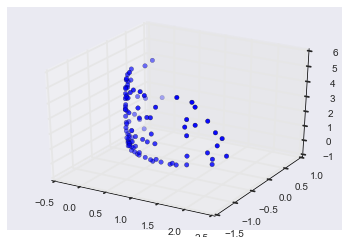

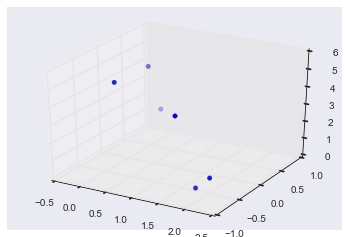

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(original_hull_pts[:,0], original_hull_pts[:,1], original_hull_pts[:,2])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(new_hull_pts[:,0], new_hull_pts[:,1], new_hull_pts[:,2])

In [64]:
new_hull = ConvexHull(new_hull_pts)

In [204]:
len(boundary_simplices)

163

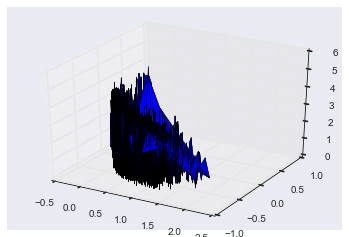

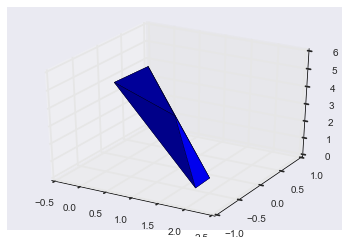

In [202]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(test_unique[:,0], test_unique[:,1], test_unique[:,2], triangles=pruned_full_simplices)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(new_hull_pts[:,0], new_hull_pts[:,1], new_hull_pts[:,2], triangles=new_hull.simplices)